<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/Final_project_DATA_70500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some Analysis of Pew Research Survey Data

This is a public opinion data source that lends itself to all sorts of timely questions about religion and politics. This is the kind of thing that you could do on the research project if you were interested in attitudes about science and technology (and could find an appropriate dataset).


In [1]:
# Code block 1ab: Installing some libraries we'll need
!pip install pyreadstat
!pip install researchpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.8 MB/s eta 0:00:00


In [2]:
# Code block 1b: Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import math
import matplotlib.pyplot as plt
import researchpy as rp
from pandas.api.types import CategoricalDtype

You can download the data from the Pew Center, https://www.pewresearch.org/science/datasets/ and then copy the files to your Drive and read the data into your notebook.

I'm using the American Trends Panel Wave 55 here. Panel study is one done repeatedly to monitor changes in trends. The data download includes a codebook for the survey, in this case, a file named ATP W55 topline.pdf. For your convenience, I've linked to it here: https://www.dropbox.com/s/o799oggh6ii17r5/ATP%20W55%20topline.pdf?dl=0

Here's a general codebook for the ATP data that is useful for identifying demographic variables to use in the analysis. (These are variables that are included in all of the waves of ATP.) https://www.dropbox.com/s/qe4fsmbq1fvr76i/Codebook-and-instructions-for-working-with-ATP-data.pdf?dl=0

We'll use the codebook to find some variables of interest and then do some basic analysis and visualization.

In [5]:
# Code block 2: Reading in data
# The format of this data source is an SPSS data file, .sav, so we installed a library--pyreadstat--that extends pandas
# by adding another read method, read_spss. We use this to read the SPSS file into a new data object.


ATPW124_df = pd.read_spss('ATP W124.sav')

### Both SPSS & STATA combine numeric representation of data & the data labels value labels

- SPSS & STATA can separate data in the spreadsheet, but pandas can't

- Must make a choice - do we keep the numbers or do we keep the labels?
- Default view of SPSS is to convert categorical variables (vars w/ labels) into categorical objects w/in dataframe, rather than numbers to discard the #s & just keep the labels
- Strings refer to the name of the category

In [6]:
ATPW124_df.head()

,QKEY,INTERVIEW_START_W124,INTERVIEW_END_W124,DEVICE_TYPE_W124,LANG_W124,FORM_W124,XW122NONRESP_W124,ECON_SIT_W124,SATISFIED_DEMOCRACY_W124,FAV_US_W124,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_REG,F_INC_SDT1,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W124
0,100598.0,2023-03-23 13:25:24,2023-03-23 13:41:43,Laptop/PC,English,Form 2,Did not respond to W122,Somewhat good,Not too satisfied,Somewhat favorable,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,You are ABSOLUTELY CERTAIN that you are regist...,"$100,000 or more",Conservative,Several times a day,Yes,Upper income,0.958677
1,101493.0,2023-03-21 15:55:04,2023-03-23 15:40:38,Laptop/PC,English,Form 2,Did not respond to W122,Very bad,Not at all satisfied,Very unfavorable,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,You are ABSOLUTELY CERTAIN that you are regist...,"$80,000 to less than $90,000",Conservative,Several times a day,No,Middle income,0.161169
2,102198.0,2023-03-22 08:42:42,2023-03-22 08:53:18,Laptop/PC,English,Form 1,Did not respond to W122,Somewhat bad,Not too satisfied,Very favorable,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,You are ABSOLUTELY CERTAIN that you are regist...,"$90,000 to less than $100,000",Conservative,Almost constantly,Yes,Middle income,1.131682
3,106180.0,2023-03-21 16:16:59,2023-03-21 16:38:20,Laptop/PC,English,Form 2,Did not respond to W122,Very bad,Not at all satisfied,Somewhat favorable,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,You are ABSOLUTELY CERTAIN that you are regist...,"$100,000 or more",Very conservative,Several times a day,Yes,Middle income,0.844816
4,108348.0,2023-03-25 18:48:43,2023-03-25 19:01:10,Laptop/PC,English,Form 2,Did not respond to W122,Somewhat bad,Somewhat satisfied,Somewhat favorable,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,You are ABSOLUTELY CERTAIN that you are regist...,"$40,000 to less than $50,000",Conservative,Several times a day,No,Middle income,1.321044


## **Use list(dfName.columns) to get a full list of variables of data frame**

- dfName.columns may not give you all the columns

In [8]:
list(ATPW124_df.columns)

['QKEY',
 'INTERVIEW_START_W124',
 'INTERVIEW_END_W124',
 'DEVICE_TYPE_W124',
 'LANG_W124',
 'FORM_W124',
 'XW122NONRESP_W124',
 'ECON_SIT_W124',
 'SATISFIED_DEMOCRACY_W124',
 'FAV_US_W124',
 'FAV_CHINA_W124',
 'FAV_EU_W124',
 'FAV_UN_W124',
 'FAV_NATO_W124',
 'FAV_RUSSIA_W124',
 'FAV_INDIA_W124',
 'FAV_UKRAINE_W124',
 'FAV_TAIWAN_W124',
 'FAVPOL_BIDEN_W124',
 'FAVPOL_TRUMP_W124',
 'PARTYFAV_REP_W124',
 'PARTYFAV_DEM_W124',
 'ACTIVE_W124',
 'COMPROMISE_W124',
 'ECON_POWER_W124',
 'CONFID_XI_W124',
 'CONFID_PUTIN_W124',
 'CONFID_MACRON_W124',
 'CONFID_SCHOLZ_W124',
 'CONFID_ZELENSKYY_W124',
 'CONFID_MODI_W124',
 'CONFID_NETANYAHU_W124',
 'CONFID_XI_DK_W124',
 'CONFID_PUTIN_DK_W124',
 'CONFID_MACRON_DK_W124',
 'CONFID_SCHOLZ_DK_W124',
 'CONFID_ZELENSKYY_DK_W124',
 'CONFID_MODI_DK_W124',
 'CONFID_NETANYAHU_DK_W124',
 'TIKTOK_KNOW_W124',
 'ALPHABET_W124',
 'TIKTOK_W124',
 'USCOMP_DANG_W124',
 'USCOMP_RELIG_W124',
 'USCOMP_TOL_W124',
 'USCOMP_DEM_W124',
 'USCOMP_STA_W124',
 'USBEST_COLLEGE_

In [12]:
# Code block 3: Inspecting variables
# What is the relationship between how satisfied American respodents are with the way democracy works in the US and what they think of the choice of political parties?

# what do you do with missing data? - treat it as missing b/c we don't know what the respondent would have answered

ATPW124_df['SATISFIED_DEMOCRACY_W124'].value_counts()

,count
SATISFIED_DEMOCRACY_W124,
Not too satisfied,1547
Somewhat satisfied,1157
Not at all satisfied,670
Very satisfied,151
Refused,51


### Treating "refused" response
- Convert it to NaN (not a number)
- **Default order for categorical variables = alphabetical**

In [13]:
#If string has "refused", convert it to not a number (missing), if not refused, then keep the original value

#Ordinal variables - goes from most to least skeptical
ATPW124_df['SATISFIED_DEMOCRACY_W124r'] = np.where(ATPW124_df['SATISFIED_DEMOCRACY_W124'].str.contains('Refused'), np.nan, ATPW124_df['SATISFIED_DEMOCRACY_W124'])
ATPW124_df['SATISFIED_DEMOCRACY_W124r'].value_counts()

,count
SATISFIED_DEMOCRACY_W124r,
Not too satisfied,1547
Somewhat satisfied,1157
Not at all satisfied,670
Very satisfied,151


## **Adjusting the order of categorical variables**
- Ordinal variables - categories' order matters

In [15]:
# The variable is ordinal, so we must use CategoricalDtype to preserve that order.

# Var cat_type will preserve the order of the categories (goes from a lot to not at all) - you set the desired order of the categories
cat_type = CategoricalDtype(categories=["Very satisfied", "Somewhat satisfied", "Not too satisfied", "Not at all satisfied"], ordered=True)

# Apply var cat_type to data frame & recoded var that has NaN for missing
ATPW124_df['SATISFIED_DEMOCRACY_W124r2'] = ATPW124_df['SATISFIED_DEMOCRACY_W124r'].astype(cat_type)
ATPW124_df['SATISFIED_DEMOCRACY_W124r2']

,SATISFIED_DEMOCRACY_W124r2
0,Not too satisfied
1,Not at all satisfied
2,Not too satisfied
3,Not at all satisfied
4,Somewhat satisfied
...,...
3571,Not too satisfied
3572,Somewhat satisfied
3573,Somewhat satisfied
3574,Not too satisfied


### **Nominal variable**
- Order does not matter, so do not have to use CategoricalDtype to adjust the order [of party affiliation]

In [18]:
ATPW124_df['PARTY_REPRESENT_W124'].value_counts()

,count
PARTY_REPRESENT_W124,
There is at least one party that represents my views well,1845
None of the parties represent my views well,1690
Refused,41


In [17]:
# Recode 'Refused' as NaN
ATPW124_df['PARTY_REPRESENT_W124r'] = np.where(ATPW124_df['PARTY_REPRESENT_W124'].str.contains('Refused'), np.nan, ATPW124_df['PARTY_REPRESENT_W124'])
ATPW124_df['PARTY_REPRESENT_W124r'].value_counts()

,count
PARTY_REPRESENT_W124r,
There is at least one party that represents my views well,1845
None of the parties represent my views well,1690


In [19]:
ATPW124_df['PARTY_REPRESENT_W124r']

,PARTY_REPRESENT_W124r
0,None of the parties represent my views well
1,None of the parties represent my views well
2,None of the parties represent my views well
3,There is at least one party that represents my...
4,There is at least one party that represents my...
...,...
3571,There is at least one party that represents my...
3572,There is at least one party that represents my...
3573,There is at least one party that represents my...
3574,None of the parties represent my views well


# **Create tables**

1.   Create cross tab - 2 way percentage table
2.   Signficance tab - Chi square test = main statistic

- Is the table reliable at p < 0.05

## **To create cross & sig tables, must first convert the categoricals**

In [20]:
# Code block 4a: Analysis with a crosstabulation (bivariate percentage table)

# Create crosstab and then significance tables
crosstab, sigtab = rp.crosstab(ATPW124_df.SATISFIED_DEMOCRACY_W124r2, ATPW124_df.PARTY_REPRESENT_W124r, prop='col', test='chi-square')
crosstab

/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 3.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


PARTY_REPRESENT_W124r  \
PARTY_REPRESENT_W124r      None of the parties represent my views well   
SATISFIED_DEMOCRACY_W124r2                                               
Very satisfied                                                    2.16   
Somewhat satisfied                                               28.81   
Not too satisfied                                                47.84   
Not at all satisfied                                             21.19   
All                                                             100.00   

                                                                                      \
PARTY_REPRESENT_W124r      There is at least one party that represents my views well   
SATISFIED_DEMOCRACY_W124r2                                                             
Very satisfied                                                           6.24          
Somewhat satisfied                                                      36.25          
Not too satisfied                                                       40.31          
Not at all satisfied                                                    17.20          
All                                                                    100.00          

                                   
PARTY_REPRESENT_W124r         All  
SATISFIED_DEMOCRACY_W124r2         
Very satisfied                4.3  
Somewhat satisfied           32.7  
Not too satisfied            43.9  
Not at all satisfied         19.1  
All                         100.0

## Table interpretation

**Cross tab**
- The belief that humans are causing climate change problems mostly falls along party lines
-- Dem's believe that humans cause a great deal of the change (77.2%)
-- Independents believe that humans cause a great deal but not to the extent of the Dems (52.1%)
-- Republics believe that humans cause some of climate change (40.7%)
-- Other ideologies believe that humans cause a great deal of hte climate change, but lower rate than Dems and slightly higher rate than Independents (54.2)

**Sig tab**
- p=0.000 = the table is reliable, meaning the pattern in the table is due to real differences in beliefs instead of random measurement error

In [21]:
print(sigtab)

                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   67.0827
1                    p-value =    0.0000
2                 Cramer's V =    0.1386


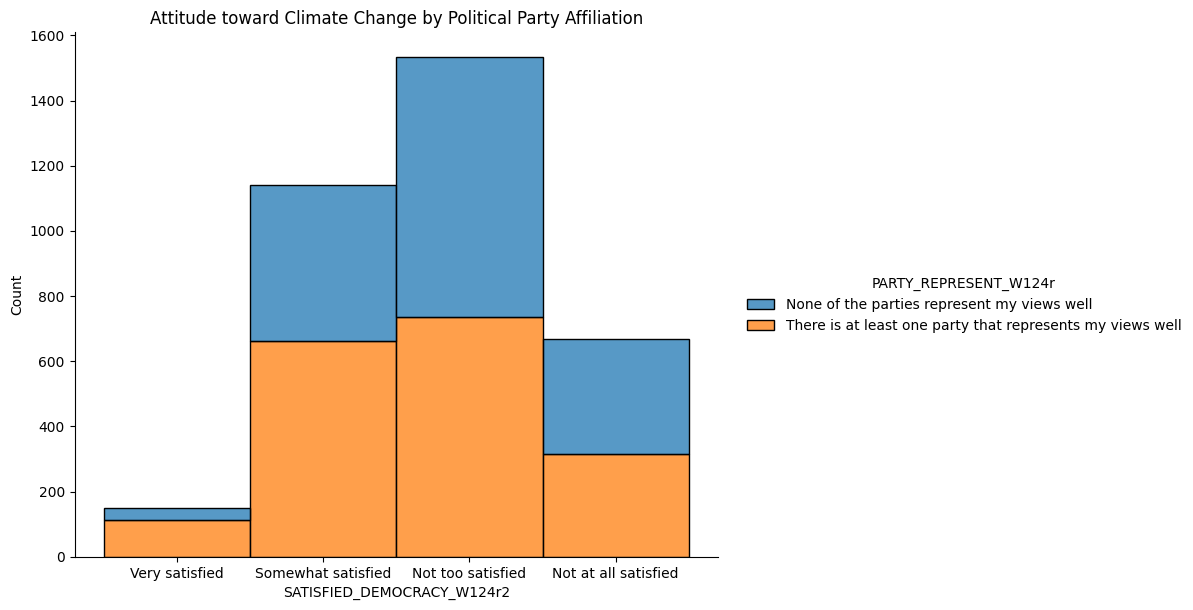

In [22]:
p = sb.displot(ATPW124_df, x='SATISFIED_DEMOCRACY_W124r2', hue='PARTY_REPRESENT_W124r', multiple="stack", height=6, aspect=1.25)
plt.title('Attitude toward Climate Change by Political Party Affiliation')
plt.show()

# Now look at how beliefs in climate change are affected by gender

1.   First, handle missing data in the 'sex' variable by recoding 'Refused' as Nan




In [24]:
ATPW124_df['ECON_SIT_W124'].value_counts()

,count
ECON_SIT_W124,
Somewhat bad,1661
Somewhat good,1030
Very bad,808
Very good,68
Refused,9


In [23]:
# Handle missing var - if string contains 'Refused' recode it as NaN

ATPW124_df['ECON_SIT_W124r'] = np.where(ATPW124_df['ECON_SIT_W124'].str.contains('Refused'), np.nan, ATPW124_df['ECON_SIT_W124'])
ATPW124_df['ECON_SIT_W124r'].value_counts()

,count
ECON_SIT_W124r,
Somewhat bad,1661
Somewhat good,1030
Very bad,808
Very good,68


In [34]:
# Ordinal variable - use categoricalDtype to maintain order
cat_type2 = CategoricalDtype(categories=["Very good", "Somewhat good", "Somewhat bad", "Very bad"], ordered=True)

# Apply var cat_type2 to data frame & recoded var that has NaN for missing
ATPW124_df['ECON_SIT_W124r2'] = ATPW124_df['ECON_SIT_W124r'].astype(cat_type2)
ATPW124_df['ECON_SIT_W124r2']

,ECON_SIT_W124r2
0,Somewhat good
1,Very bad
2,Somewhat bad
3,Very bad
4,Somewhat bad
...,...
3571,Very bad
3572,Somewhat good
3573,Somewhat good
3574,Very bad


## Create cross tab and sig tab

In [29]:
# Code block 4b: More analysis with a crosstabulation (bivariate percentage table)
crosstab, sigtab = rp.crosstab(ATPW124_df.SATISFIED_DEMOCRACY_W124r2, ATPW124_df.ECON_SIT_W124r2, prop='col', test='chi-square')
crosstab


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 9.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


ECON_SIT_W124r2                             \
ECON_SIT_W124r2                  Very good Somewhat good Somewhat bad   
SATISFIED_DEMOCRACY_W124r2                                              
Very satisfied                       47.76          7.30         2.02   
Somewhat satisfied                   32.84         59.76        28.53   
Not too satisfied                    13.43         28.21        58.16   
Not at all satisfied                  5.97          4.73        11.29   
All                                 100.00        100.00       100.00   

                                             
ECON_SIT_W124r2            Very bad     All  
SATISFIED_DEMOCRACY_W124r2                   
Very satisfied                 1.36    4.26  
Somewhat satisfied             7.81   32.86  
Not too satisfied             37.17   43.86  
Not at all satisfied          53.66   19.02  
All                          100.00  100.00

### Table Interpretation

**Cross tab**
- The order of beliefs are the same for both genders (great deal > some > not much > not at all)
- More females than males believe that humans cause a great deal of climate change (54.57% & 50.64%, respectively)
- More females than males believe that humans cause Ssome of climite change (30.01% & 26.32%, respectively)
- More males than females believe that humans cause not too much climate change (16.33% & 11.32%, respectively)
- More males than females believe that humans do not cause human change at all (6.72% & 4.10%, respectively)


**Sig tab**
- p = 0.000 - table is reliable - the patterns are due to real differences in beliefs by gender rather than random measurement error


In [27]:
sigtab

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,1571.2689
1,p-value =,0.0000
2,Cramer's V =,0.3858


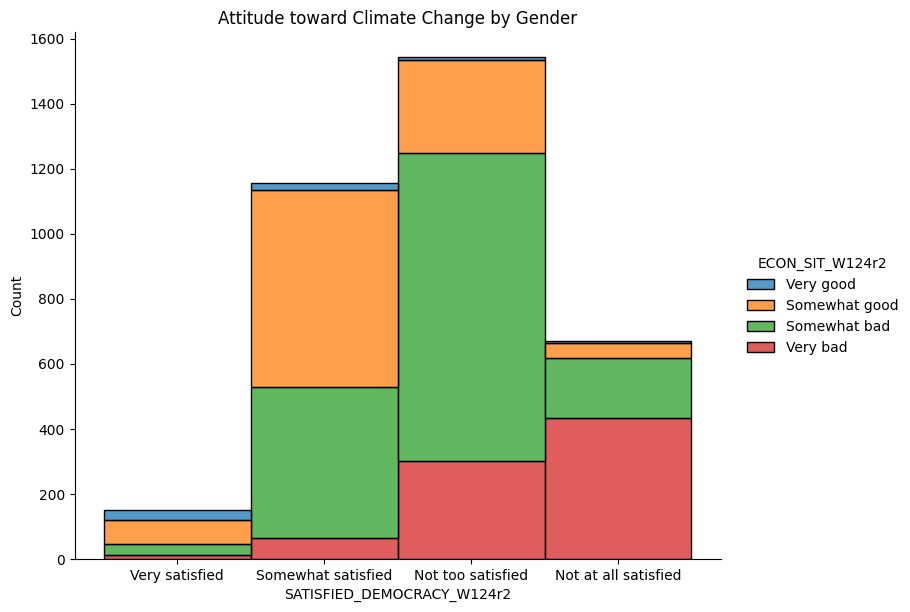

In [35]:
p = sb.displot(ATPW124_df, x='SATISFIED_DEMOCRACY_W124r2', hue='ECON_SIT_W124r2', multiple="stack", height=6, aspect=1.25)
plt.title('Attitude toward Climate Change by Gender')
plt.show()

# **Computing linear model without variables converting them to categoricals**

- Read in SPSS file and add convert_categoricals=False to preserve the numeric variables (it's TRUE by default)

## **Do NOT convert categoricals if you want to run the linear model**

In [53]:
# I'm going to read in some variables without converting them to categoricals in order to compute a linear model.

Demo_df = pd.read_spss('ATP W124.sav', usecols=['SATISFIED_DEMOCRACY_W124', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT', 'F_HISP', 'F_RACECMB', 'F_METRO', 'F_CITIZEN', 'F_PARTY_FINAL', 'F_INC_TIER2'], convert_categoricals=False)

## Create **BINARY** variables to id demo characteristics to model
- Divide the survey question into 2 categories (yes/no)
- Create variable to describe the high category vs the low category
- Set the new variable to 0 and then switch it to 1 for some respondents
- Code below uses a more condensed version of the np.where statement
-- Where is an if/then question


In [54]:
# Create some binary vectors to identify demographic characteristics to model.
# Divide the questions into categories - easier to read
# You can do this manually:

# Is the respondent young or not?
Demo_df['young'] = 0
Demo_df.loc[Demo_df['F_AGECAT'] == 1, ['young']] = 1

# Is respondent a woman?
Demo_df['women'] = 0
Demo_df.loc[Demo_df['F_GENDER'] == 2, ['women']] = 1

# Does respondent have college degree?
Demo_df['college'] = 0
Demo_df.loc[Demo_df['F_EDUCCAT'] == 1, ['college']] = 1

# Is respondent black or not?
Demo_df['black'] = 0
Demo_df.loc[Demo_df['F_RACECMB'] == 2, ['black']] = 1

# Is respondent Latino or not?
Demo_df['latin'] = 0
Demo_df.loc[Demo_df['F_HISP'] == 1, ['latin']] = 1

# Does respondent live in metropolitan area?
Demo_df['metro'] = 0
Demo_df.loc[Demo_df['F_METRO'] == 1, ['metro']] = 1

# Does respondent have citizenaship?
Demo_df['citizen'] = 0
Demo_df.loc[Demo_df['F_CITIZEN'] == 1, ['citizen']] = 1

# Is respondent a republican or not?
Demo_df['republican'] = 0
Demo_df.loc[Demo_df['F_PARTY_FINAL'] == 1, ['republican']] = 1

# Respondent's income leve?
Demo_df['low-income'] = 0
Demo_df.loc[Demo_df['F_INC_TIER2'] == 1, ['low-income']] = 1

In [43]:
Demo_df['young'].value_counts()

,count
young,
0,3081
1,495


In [ ]:
Demo_df['women'].value_counts()

,count
women,
1,1962
0,1665


In [ ]:
Demo_df['college'].value_counts()

,count
college,
0,2073
1,1554


In [ ]:
Demo_df['black'].value_counts()

,count
black,
0,3201
1,426


In [ ]:
Demo_df['latinx'].value_counts()

,count
latinx,
0,3136
1,491


In [ ]:
Demo_df['churchgoer'].value_counts()

,count
churchgoer,
0,2664
1,963


In [ ]:
Demo_df['bornagain'].value_counts()

,count
bornagain,
0,2663
1,964


In [ ]:
Demo_df['republican'].value_counts()

,count
republican,
0,2704
1,923


## Can create binaries using where
- Code is more efficient but harder to interpret
- Can create binaries using the code above (no where) or the code below (where) - don't need to do both

# **np.where(logical condition, value if true, value if false)**
Example looking at who is rural and who is not
- **ATPW55_df['rural'] = np.where(ATPW55_df['F_METRO'] == 2, 1, 0)**
- logical condition = ATPW55_df['F_METRO'] == 2 (in SPSS, rural is coded as 2, so if F_METRO is set to 2)
- value if true = 1 (If ['F_METRO'] == 2, (TRUE) then recode it as 1
- value if false = 0 (If ['F_METRO'] !== 2, (FALSE -doesn't equal 2), then recode it as 0

In [55]:
# Or, you can use the where() method in the NumPy library to create a binary using
# a logical test, as I did above to code missing values.
# WHERE method
Demo_df['youngr'] = np.where(Demo_df['F_AGECAT'] == 1, 1, 0)

# This is more efficient code, but harder to read when you're learning Python
Demo_df['youngr'].value_counts()

,count
youngr,
0,3081
1,495


## Recode climate skepticism variable into binary
- Use where method or not

In [64]:
# If value is greater than 4, then label as Nan - write this in 2 ways

# (1) No where method
Demo_df.loc[Demo_df['SATISFIED_DEMOCRACY_W124'] > 4, ['SATISFIED_DEMOCRACY_W124']] = np.nan

# (2) Use where method:
Demo_df['SATISFIED_DEMOCRACY_W124r'] = np.where(Demo_df['SATISFIED_DEMOCRACY_W124'] > 4, np.nan, Demo_df['SATISFIED_DEMOCRACY_W124'])

Demo_df['SATISFIED_DEMOCRACY_W124r'].value_counts() #Same as Demo['SATISFIED_DEMOCRACY_W124r'].value_counts()

,count
SATISFIED_DEMOCRACY_W124r,
3.0,1547
2.0,1157
4.0,670
1.0,151


In [67]:
# Linear model to predict belief in Demo crisis
Y = Demo_df['SATISFIED_DEMOCRACY_W124'] # A higher score indicates more Demo crisis skepticism
X = Demo_df[['young', 'women', 'college', 'black', 'latin', 'metro', 'citizen', 'republican', 'low-income']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                               OLS Regression Results                               
Dep. Variable:     SATISFIED_DEMOCRACY_W124   R-squared:                       0.068
Model:                                  OLS   Adj. R-squared:                  0.065
Method:                       Least Squares   F-statistic:                     28.28
Date:                      Sun, 22 Dec 2024   Prob (F-statistic):           7.02e-48
Time:                              06:03:52   Log-Likelihood:                -4090.7
No. Observations:                      3525   AIC:                             8201.
Df Residuals:                          3515   BIC:                             8263.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [68]:
# This is the same model, with the recoded DV, showing the same results.
# Linear model to predict belief in Demo crisis
Y = Demo_df['SATISFIED_DEMOCRACY_W124r'] # A higher score indicates more Demo crisis skepticism
X = Demo_df[['young', 'women', 'college', 'black', 'latin', 'metro', 'citizen', 'republican', 'low-income']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X, missing='drop').fit()
print(model1.summary())

                                OLS Regression Results                               
Dep. Variable:     SATISFIED_DEMOCRACY_W124r   R-squared:                       0.068
Model:                                   OLS   Adj. R-squared:                  0.065
Method:                        Least Squares   F-statistic:                     28.28
Date:                       Sun, 22 Dec 2024   Prob (F-statistic):           7.02e-48
Time:                               06:03:57   Log-Likelihood:                -4090.7
No. Observations:                       3525   AIC:                             8201.
Df Residuals:                           3515   BIC:                             8263.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [76]:
# Recode dependent variable as binary  -if somewhat or very satisfied, recode as 1 (yes) and 0 (no - somewhat or very dissatisfied)
Demo_df['satisfied_demo'] = np.where(Demo_df['SATISFIED_DEMOCRACY_W124'] < 3, 1, 0)
Demo_df['satisfied_demo'].value_counts()

,count
satisfied_demo,
0,2268
1,1308


In [77]:
# Logistic model to predict belief in Demo crisis
Y = Demo_df['satisfied_demo'] # binary measure of belief in Demo crisis
X = Demo_df[['young', 'women', 'college', 'black', 'latin', 'metro', 'citizen', 'republican', 'low-income']]
X = sm.add_constant(X)
model2 = sm.Logit(Y, X, missing='drop').fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.629237
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         satisfied_demo   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3566
Method:                           MLE   Df Model:                            9
Date:                Sun, 22 Dec 2024   Pseudo R-squ.:                 0.04177
Time:                        06:10:44   Log-Likelihood:                -2250.1
converged:                       True   LL-Null:                       -2348.2
Covariance Type:            nonrobust   LLR p-value:                 2.090e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0562      0.197      0.286      0.775      -0.330       0.442
young         -0.2620      0.

In [78]:
model2_marginals = model2.get_margeff(at='median')
print(model2_marginals.summary())

        Logit Marginal Effects       
Dep. Variable:         satisfied_demo
Method:                          dydx
At:                            median
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
young         -0.0607      0.025     -2.453      0.014      -0.109      -0.012
women         -0.0350      0.018     -1.920      0.055      -0.071       0.001
college        0.0634      0.017      3.768      0.000       0.030       0.096
black          0.0590      0.022      2.728      0.006       0.017       0.101
latin          0.0783      0.021      3.785      0.000       0.038       0.119
metro         -0.0190      0.029     -0.648      0.517      -0.076       0.038
citizen       -0.1227      0.033     -3.689      0.000      -0.188      -0.058
republican    -0.2157      0.024     -8.991      0.000      -0.263      -0.169
low-income     0.0047      0.020      0.236      0.814    

## Activity

1. Download a data file from the Pew Center. Copy the file to your Drive and read it into a data object.
2. Create a crosstabulation and a visualization to depict the relationship between a demographic variable and an attitudinal variable.
3. Create a linear model to predict the attitudinal variable.
4. Interpret the results.